In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('todossantos.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head(10)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,22:00,271,259,10.59,17.4,24.8,41,1007.3,0.0,555.5
1,25/01/2018,23:00,269,280,10.48,17.6,23.9,44,1007.5,0.0,324.5
2,26/01/2018,00:00,277,269,7.12,15.9,23.2,50,1007.9,0.0,96.5
3,26/01/2018,01:00,263,272,3.87,8.1,21.5,59,1008.5,0.0,1.5
4,26/01/2018,02:00,132,140,1.91,4.9,20.4,61,1009.4,0.0,0.0
5,26/01/2018,03:00,93,90,9.91,16.2,20.0,63,1010.1,0.0,0.0
6,26/01/2018,04:00,92,97,10.72,17.7,19.3,65,1010.1,0.0,0.0
7,26/01/2018,05:00,91,78,9.67,17.6,19.3,61,1010.3,0.0,0.0
8,26/01/2018,06:00,101,90,8.44,12.0,19.2,62,1010.2,0.0,0.0
9,26/01/2018,07:00,305,107,0.73,7.9,16.8,67,1010.0,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst= True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,271,259,10.59,17.4,24.8,41,1007.3,0.0,555.5,2018-01-25 22:00:00
1,269,280,10.48,17.6,23.9,44,1007.5,0.0,324.5,2018-01-25 23:00:00
2,277,269,7.12,15.9,23.2,50,1007.9,0.0,96.5,2018-01-26 00:00:00
3,263,272,3.87,8.1,21.5,59,1008.5,0.0,1.5,2018-01-26 01:00:00
4,132,140,1.91,4.9,20.4,61,1009.4,0.0,0.0,2018-01-26 02:00:00


In [8]:
df.dtypes

DIRS               int64
DIRR               int64
VELS             float64
VELR             float64
TEMP             float64
HR                 int64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [9]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,154.383234,144.580838,6.908862,15.406587,21.982036,46.425150,1006.810180,0.0,170.393413
std,107.384611,103.975572,4.989053,7.274350,3.755659,18.282063,1.507477,0.0,262.159527
min,2.000000,2.000000,0.340000,2.700000,14.000000,9.000000,1003.700000,0.0,0.000000
25%,52.000000,52.000000,2.390000,9.700000,19.200000,31.000000,1005.800000,0.0,0.000000
50%,135.000000,133.000000,6.310000,15.100000,22.300000,49.000000,1006.500000,0.0,0.000000
75%,250.000000,232.000000,10.110000,19.100000,24.700000,60.000000,1007.600000,0.0,302.350000
max,359.000000,353.000000,20.530000,34.700000,31.200000,85.000000,1010.900000,0.0,853.700000


In [10]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,271,259,10.59,17.4,24.8,41,1007.3,0.0,555.5,2018-01-25 22:00:00
19,276,270,8.52,15.1,24.7,29,1010.9,0.0,636.7,2018-01-26 17:00:00
28,67,44,9.67,15.4,24.5,13,1007.3,0.0,0.0,2018-01-27 02:00:00
42,142,35,2.12,16.8,24.2,9,1008.4,0.0,367.7,2018-01-27 16:00:00
51,4,26,16.82,34.3,24.5,26,1004.9,0.0,2.8,2018-01-28 01:00:00
67,248,257,4.81,13.4,24.5,34,1007.4,0.0,709.0,2018-01-28 17:00:00
68,252,270,7.81,13.9,24.2,36,1006.9,0.0,723.2,2018-01-28 18:00:00
74,155,160,11.85,22.9,24.4,51,1003.9,0.0,116.8,2018-01-29 00:00:00
93,257,249,9.81,16.8,24.8,44,1007.1,0.0,696.2,2018-01-29 19:00:00
97,260,283,7.37,13.4,24.7,52,1005.3,0.0,351.3,2018-01-29 23:00:00


In [11]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       154.383234
DIRR       144.580838
VELS         6.908862
VELR        15.406587
TEMP        21.982036
HR          46.425150
PB        1006.810180
PREC         0.000000
RADSOL     170.393413
dtype: float64

In [12]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

21.982035928143706

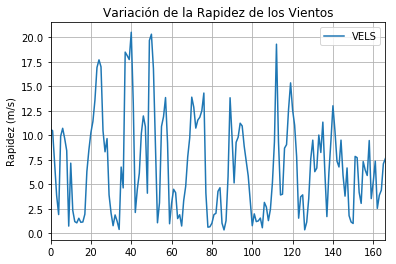

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

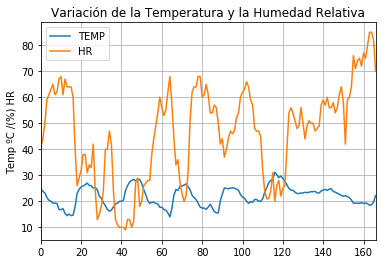

In [14]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

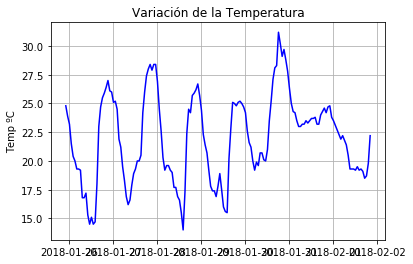

In [15]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [16]:
# Selecciona los datos del día 26 de Enero del 2018 
df1 = df[df.FECHA > '2018-01-25 23:00:00'] 
df_dia = df_tmp[df_tmp.FECHA <'2018-01-27 00:00:00']
df_dia

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,271,259,10.59,17.4,24.8,41,1007.3,0.0,555.5,2018-01-25 22:00:00
19,276,270,8.52,15.1,24.7,29,1010.9,0.0,636.7,2018-01-26 17:00:00
20,273,272,10.29,17.5,25.5,32,1010.2,0.0,784.3,2018-01-26 18:00:00
21,271,272,11.43,19.8,25.9,38,1009.4,0.0,853.7,2018-01-26 19:00:00
22,292,311,13.61,25.0,26.4,38,1008.4,0.0,824.7,2018-01-26 20:00:00
23,304,310,16.92,28.8,27.0,31,1007.4,0.0,729.7,2018-01-26 21:00:00
24,304,297,17.71,30.5,26.1,34,1006.8,0.0,561.8,2018-01-26 22:00:00
25,305,315,17.00,33.3,26.0,33,1006.6,0.0,331.7,2018-01-26 23:00:00


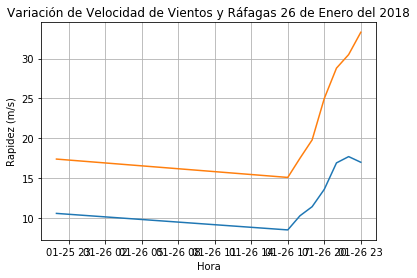

In [17]:
# Gráfica de velocidad de vientos y ráfagas 26/01/18
y=df_dia[['VELS','VELR']]
x=df_dia['FECHA' ]
plt.plot(x,y)
plt.title("Variación de Velocidad de Vientos y Ráfagas 26 de Enero del 2018")
plt.ylabel("Rapidez (m/s)")
plt.xlabel("Hora")
plt.grid(True)
plt.show()

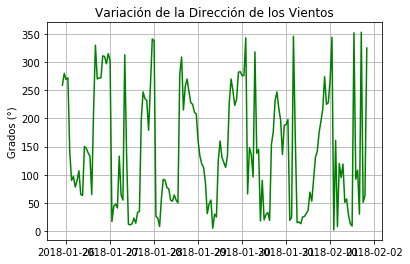

In [18]:
# Gráfica de dirección de vientos
plt.plot_date(x=df.FECHA, y=df.DIRR, fmt="g-")
plt.title("Variación de la Dirección de los Vientos")
plt.ylabel("Grados (°)")
plt.grid(True)
plt.show()

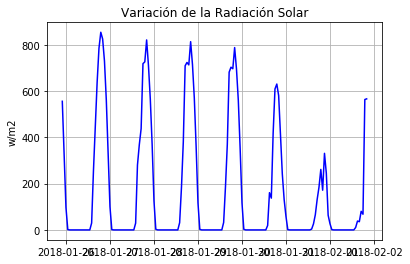

In [19]:
# Radiación Solar respecto al tiempo
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la Radiación Solar")
plt.ylabel("w/m2")
plt.grid(True)
plt.show()

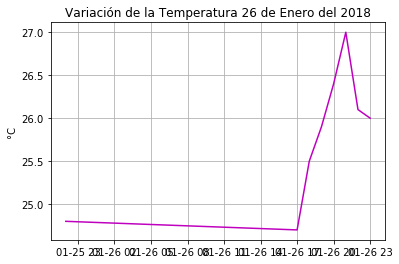

In [20]:
# Gráfica de Temperatura 26/01/18
plt.plot_date(x=df_dia.FECHA, y=df_dia.TEMP, fmt="m-")
plt.title("Variación de la Temperatura 26 de Enero del 2018")
plt.ylabel("°C")
plt.grid(True)
plt.show()

In [25]:
#Rango de temperaturas
df_dia.TEMP.max()-df_dia.TEMP.min()

2.3000000000000007

In [26]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,154.383234,144.580838,6.908862,15.406587,21.982036,46.425150,1006.810180,0.0,170.393413
std,107.384611,103.975572,4.989053,7.274350,3.755659,18.282063,1.507477,0.0,262.159527
min,2.000000,2.000000,0.340000,2.700000,14.000000,9.000000,1003.700000,0.0,0.000000
25%,52.000000,52.000000,2.390000,9.700000,19.200000,31.000000,1005.800000,0.0,0.000000
50%,135.000000,133.000000,6.310000,15.100000,22.300000,49.000000,1006.500000,0.0,0.000000
75%,250.000000,232.000000,10.110000,19.100000,24.700000,60.000000,1007.600000,0.0,302.350000
max,359.000000,353.000000,20.530000,34.700000,31.200000,85.000000,1010.900000,0.0,853.700000
